## Boosting(1) - RamdomForestClassifier

In [1]:
#introduction to machinelearning with python p87 
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
#from sklearn.learning_curve import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve, auc

from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)
print(forest.get_params)
print("forest train score: {:.3f}".format(forest.score(X_train,y_train)))
print("forest test score: {:.3f}".format(forest.score(X_test,y_test)))
#print(forest.estimators_)

forest20 = RandomForestClassifier(n_estimators = 20, random_state = 0)
forest20.fit(X_train, y_train)
print("forest20 train score: {:.3f}".format(forest20.score(X_train,y_train)))
print("forest20 test score: {:.3f}".format(forest20.score(X_test,y_test)))
#print(forest20.estimators_)

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)>
forest train score: 0.998
forest test score: 0.944
forest20 train score: 0.998
forest20 test score: 0.951


In [38]:
print("-----------------------")
forest_final = RandomForestClassifier(n_estimators=5, random_state = 0, bootstrap= True, criterion = 'entropy',
                                             max_depth= 3, max_features = 7, min_samples_split= 2)
start = time()
forest_final.fit(X_train, y_train)
print("time took: %.3f seconds "%(time() - start))  #after fitting
print("RandomForest final score - training (tanh) : {:.3f}".format(forest_final.score(X_train, y_train)))
print("RandomForest final score - test (tanh) : {:.3f}".format(forest_final.score(X_test, y_test)))

y_pred = forest_final.predict(X_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("RandomForest final AUC score - training set: {:.3f}".format(roc_auc))

y_pred = forest_final.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("RandomForest final AUC score - test set: {:.3f}".format(roc_auc))
print("-----------------------")

-----------------------
time took: 0.020 seconds 
RandomForest final score - training (tanh) : 0.977
RandomForest final score - test (tanh) : 0.944
RandomForest final AUC score - training set: 0.974
RandomForest final AUC score - test set: 0.940
-----------------------


In [31]:
print("-----------------------")
forest_final = RandomForestClassifier(n_estimators=5, random_state = 0, bootstrap= True, criterion = 'entropy',
                                             max_depth= 3, max_features = 7, min_samples_split= 6)
forest_final.fit(X_train, y_train)
print("time took: %.3f seconds "%(time() - start))  #after fitting
print("RandomForest final score - training (tanh) : {:.3f}".format(forest_final.score(X_train, y_train)))
print("RandomForest final score - test (tanh) : {:.3f}".format(forest_final.score(X_test, y_test)))

y_pred = forest_final.predict(X_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("RandomForest final AUC score - training set: {:.3f}".format(roc_auc))

y_pred = forest_final.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("RandomForest final AUC score - test set: {:.3f}".format(roc_auc))
print("-----------------------")

-----------------------
time took: 2590.630 seconds 
RandomForest final score - training (tanh) : 0.977
RandomForest final score - test (tanh) : 0.944
RandomForest final AUC score - training set: 0.974
RandomForest final AUC score - test set: 0.940
-----------------------


### Learning Curve

<module 'matplotlib.pyplot' from 'c:\\users\\nfleming\\appdata\\local\\programs\\python\\python37-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

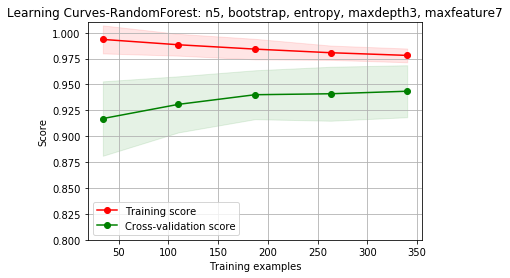

In [37]:
#learning curve
def plot_learning_curve (estimator, title, X,y, ylim = None, cv = None, 
                         n_jobs = None, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim (*ylim)
    plt.xlabel ("Training examples")
    plt.ylabel ("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.1, color = "r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r", label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g", label = "Cross-validation score")
    plt.legend(loc ="best")
    return plt

X, y = X_train, y_train

title = "Learning Curves-RandomForest: n5, bootstrap, entropy, maxdepth3, maxfeature7"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = forest_final
plot_learning_curve(estimator, title, X, y, ylim = (0.8, 1.01), cv = cv, n_jobs = 4)

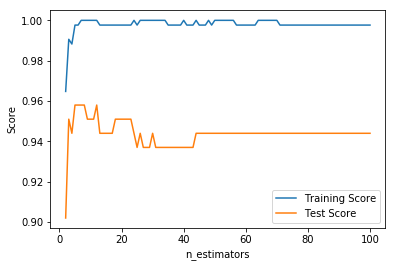

In [24]:
training_accuracy = []
test_accuracy = []
#try n_neighbors from 1 to 20
n_estimators = range(2,101)

for n_estimator in n_estimators:
    #knclf = KNeighborsClassifier(n_neighbors = n_neighbors)
    forest = RandomForestClassifier(n_estimators = n_estimator, random_state = 0)
    forest.fit(X_train, y_train)
    training_accuracy.append(forest.score(X_train, y_train))
    test_accuracy.append(forest.score(X_test, y_test))
    
plt.plot(n_estimators, training_accuracy, label = "Training Score")
plt.plot(n_estimators, test_accuracy, label = "Test Score")
plt.ylabel("Score")
plt.xlabel("n_estimators")
plt.legend()
plt.show() #going with 5

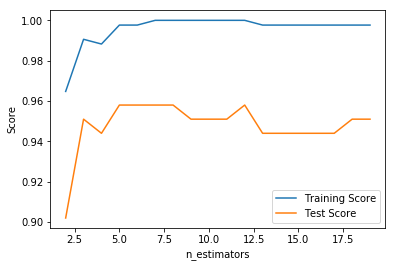

In [25]:
training_accuracy = []
test_accuracy = []
#try n_neighbors from 1 to 20
n_estimators = range(2,20)

for n_estimator in n_estimators:
    #knclf = KNeighborsClassifier(n_neighbors = n_neighbors)
    forest = RandomForestClassifier(n_estimators = n_estimator, random_state = 0)
    forest.fit(X_train, y_train)
    training_accuracy.append(forest.score(X_train, y_train))
    test_accuracy.append(forest.score(X_test, y_test))
    
plt.plot(n_estimators, training_accuracy, label = "Training Score")
plt.plot(n_estimators, test_accuracy, label = "Test Score")
plt.ylabel("Score")
plt.xlabel("n_estimators")
plt.legend()

plt.show()

### Grid Search

In [14]:
forest5 = RandomForestClassifier(n_estimators = 5, random_state = 0)
forest5.fit(X_train, y_train)
X, y = X_train, y_train
#default - max_features; auto If “auto”, then max_features=sqrt(n_features). cancer['data'].shape: (569, 30) ~5-6
print("forest5 train score: {:.3f}".format(forest5.score(X_train,y_train)))
print("forest5 test score: {:.3f}".format(forest5.score(X_test,y_test)))

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")   
param_grid = {"max_depth": np.arange(1,5),
              "max_features": np.arange(1,11),     #[1,3,10],
              "min_samples_split": np.arange(2,6),    #[2,3,10],
              "bootstrap": [ True, False],
              "criterion":["gini", "entropy"]}

grid_search = GridSearchCV(forest5, param_grid = param_grid, cv = 5)
start = time()
grid_search.fit(X_train, y_train)
print("***GridSearchCV took %.2f seconds for %d candidates parameter settings."
      %((time() - start), len(grid_search.cv_results_['params'])))
#report(grid_search.cv_results_)

"""print("----------------------")
        
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1,11),
              "min_samples_split": sp_randint (2,11),
              "bootstrap":[True, False],
              "criterion":["gini", "entropy"]}
n_iter_search = 20
random_search = RandomizedSearchCV(forest5, param_distributions = param_dist, n_iter = n_iter_search, cv = 5) #what's cv?
start = time()
random_search.fit(X_train, y_train)
print("***RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
      %((time() - start), n_iter_search))
report(random_search.cv_results_)
#print(random_search.cv_results_) """



forest5 train score: 0.998
forest5 test score: 0.958
***GridSearchCV took 27.62 seconds for 640 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.969 (std: 0.020)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 6, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.969 (std: 0.019)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 6, 'min_samples_split': 3}

Model with rank: 3
Mean validation score: 0.967 (std: 0.019)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 6, 'min_samples_split': 4}

Model with rank: 3
Mean validation score: 0.967 (std: 0.011)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 8, 'min_samples_split': 2}



c:\users\nfleming\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


'print("----------------------")\n        \nparam_dist = {"max_depth": [3, None],\n              "max_features": sp_randint(1,11),\n              "min_samples_split": sp_randint (2,11),\n              "bootstrap":[True, False],\n              "criterion":["gini", "entropy"]}\nn_iter_search = 20\nrandom_search = RandomizedSearchCV(forest5, param_distributions = param_dist, n_iter = n_iter_search, cv = 5) #what\'s cv?\nstart = time()\nrandom_search.fit(X_train, y_train)\nprint("***RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."\n      %((time() - start), n_iter_search))\nreport(random_search.cv_results_)\n#print(random_search.cv_results_) '

### Validation Curve

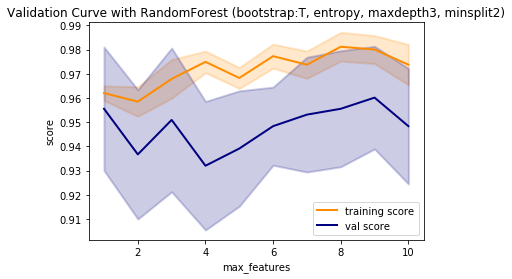

In [22]:
#validation curve
max_features = range(1,11)
training_score, val_score = validation_curve(RandomForestClassifier(n_estimators=5, random_state = 0, bootstrap= True, criterion = 'entropy',
                                             max_depth= 3, min_samples_split= 2), 
                                             X_train, y_train,
                                             param_name = "max_features", 
                                             param_range = max_features, cv= 7)

## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("Validation Curve with RandomForest (bootstrap:T, entropy, maxdepth3, minsplit2)") 
plt.xlabel("max_features")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(max_features, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(max_features, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(max_features, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(max_features, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend(loc = 'lower right')
plt.show()   

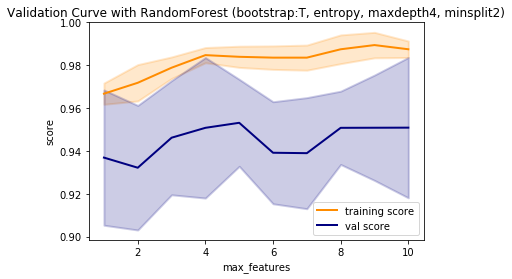

In [23]:
#validation curve
max_features = range(1,11)
training_score, val_score = validation_curve(RandomForestClassifier(n_estimators=5, random_state = 0, bootstrap= True, criterion = 'entropy',
                                             max_depth= 4, min_samples_split= 2), 
                                             X_train, y_train,
                                             param_name = "max_features", 
                                             param_range = max_features, cv= 7)

## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("Validation Curve with RandomForest (bootstrap:T, entropy, maxdepth4, minsplit2)") 
plt.xlabel("max_features")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(max_features, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(max_features, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(max_features, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(max_features, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend(loc = 'lower right')
plt.show()   

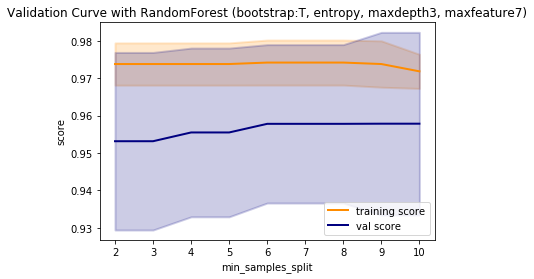

In [28]:
#validation curve
min_samples_split = range(2,11)
training_score, val_score = validation_curve(RandomForestClassifier(n_estimators=5, random_state = 0, bootstrap= True,
                                             criterion = 'entropy',
                                             max_depth= 3, max_features = 7), 
                                             X_train, y_train,
                                             param_name = "min_samples_split", 
                                             param_range = min_samples_split, cv= 7)

## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("Validation Curve with RandomForest (bootstrap:T, entropy, maxdepth3, maxfeature7)") 
plt.xlabel("min_samples_split")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(min_samples_split, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(min_samples_split, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(min_samples_split, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(min_samples_split, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend(loc = 'lower right')
plt.show()   

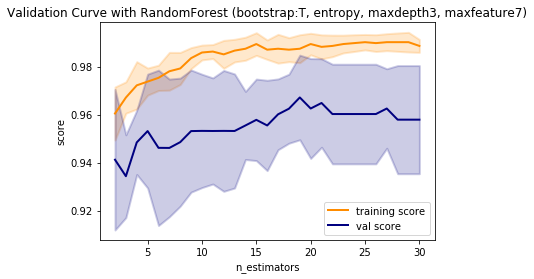

In [34]:
#validation curve
n_estimators = range(2,31)
training_score, val_score = validation_curve(RandomForestClassifier(random_state = 0, bootstrap= True,
                                             criterion = 'entropy',
                                             max_depth= 3, max_features = 7), 
                                             X_train, y_train,
                                             param_name = "n_estimators", 
                                             param_range = n_estimators, cv= 7)

## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("Validation Curve with RandomForest (bootstrap:T, entropy, maxdepth3, maxfeature7)") 
plt.xlabel("n_estimators")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(n_estimators, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(n_estimators, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(n_estimators, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(n_estimators, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend(loc = 'lower right')
plt.show()   

In [ ]:
#validation curve
n_settings = range(1,21)
training_score, val_score = validation_curve(RandomForestClassifier(random_state = 0, bootstrap= True, criterion = 'entropy',
                                   max_depth= 3, max_features = 6, min_samples_split= 6), 
                                             X_train, y_train,
                                             param_name = "n_estimators", 
                                             param_range = n_settings, cv= 7)

## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("Validation Curve with RandomForest") 
plt.xlabel("n_estimators")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(n_settings, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(n_settings, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(n_settings, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(n_settings, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend(loc = 'lower right')
plt.show()   

              feature_names  importance
0               mean radius    0.029691
1              mean texture    0.017209
2            mean perimeter    0.069298
3                 mean area    0.041130
4           mean smoothness    0.005004
5          mean compactness    0.006369
6            mean concavity    0.080562
7       mean concave points    0.092007
8             mean symmetry    0.004352
9    mean fractal dimension    0.004284
10             radius error    0.021363
11            texture error    0.004205
12          perimeter error    0.013548
13               area error    0.023038
14         smoothness error    0.002889
15        compactness error    0.005932
16          concavity error    0.004687
17     concave points error    0.002788
18           symmetry error    0.003081
19  fractal dimension error    0.002292
20             worst radius    0.125422
21            worst texture    0.017049
22          worst perimeter    0.195366
23               worst area    0.074379


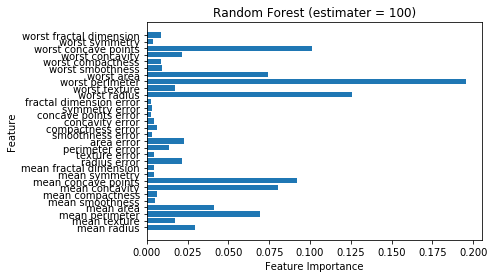

In [4]:
def plot_feature_importances_cancer (model,title):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.title(title)

title = "Random Forest (estimater = 100)"
plot_feature_importances_cancer(forest,title)
import pandas as pd
df = pd.DataFrame({'feature_names': cancer.feature_names, 'importance':forest.feature_importances_})
print(df)

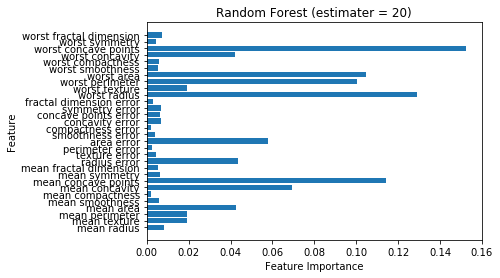

In [19]:
title20 = "Random Forest (estimater = 20)"
plot_feature_importances_cancer(forest20, title20)

In [7]:
forest_maxd4 = RandomForestClassifier(n_estimators = 100, max_depth = 2,random_state = 0)
forest_maxd4.fit(X_train, y_train)
print("forest max depth 4 train score: {:.3f}".format(forest_maxd4.score(X_train,y_train)))
print("forest max depth 4 test score: {:.3f}".format(forest_maxd4.score(X_test,y_test)))

forest max depth 4 train score: 0.965
forest max depth 4 test score: 0.930


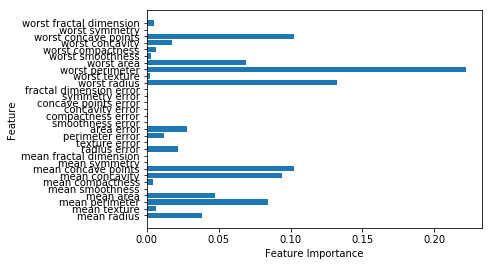

In [8]:
plot_feature_importances_cancer(forest_maxd4)

In [45]:
forest5_ = RandomForestClassifier(n_estimators = 5, random_state = 0,max_depth= None, bootstrap= False, 
                                 criterion = 'entropy', max_features = 10, min_samples_split= 2 )
forest5_.fit(X_train, y_train)
print("forest5_ train score: {:.3f}".format(forest5_.score(X_train,y_train)))
print("forest5_ test score: {:.3f}".format(forest5_.score(X_test,y_test)))

forest5_ train score: 1.000
forest5_ test score: 0.930


In [44]:
forest5_2 = RandomForestClassifier(n_estimators = 5, random_state = 0, bootstrap= True, criterion = 'gini',
                                   max_depth= 3, max_features = 9, min_samples_split= 6 )

#{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_split': 6}

forest5_2.fit(X_train, y_train)
print("forest5_2 train score: {:.3f}".format(forest5_2.score(X_train,y_train)))
print("forest5_2 test score: {:.3f}".format(forest5_2.score(X_test,y_test)))

forest5_2 train score: 0.967
forest5_2 test score: 0.923


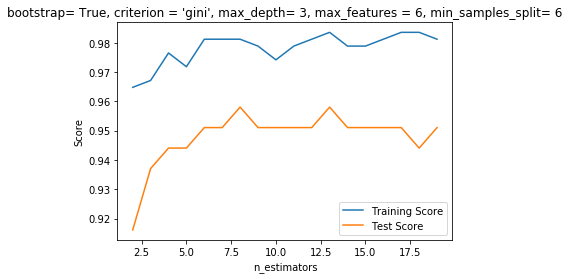

In [64]:
training_accuracy = []
test_accuracy = []
#try n_neighbors from 1 to 20
n_estimators = range(2,20)

for n_estimator in n_estimators:
    #knclf = KNeighborsClassifier(n_neighbors = n_neighbors)
    forest = RandomForestClassifier(n_estimators = n_estimator, random_state = 0, bootstrap= True, criterion = 'gini',
                                   max_depth= 3, max_features = 6, min_samples_split= 6 )
    forest.fit(X_train, y_train)
    training_accuracy.append(forest.score(X_train, y_train))
    test_accuracy.append(forest.score(X_test, y_test))
    
plt.plot(n_estimators, training_accuracy, label = "Training Score")
plt.plot(n_estimators, test_accuracy, label = "Test Score")
plt.ylabel("Score")
plt.xlabel("n_estimators")
plt.legend()
plt.title("bootstrap= True, criterion = 'gini', max_depth= 3, max_features = 6, min_samples_split= 6")
plt.show()

In [67]:
forest8_3 = RandomForestClassifier(n_estimators = 8, random_state = 0, bootstrap= True, criterion = 'gini',
                                   max_depth= 3, max_features = 6, min_samples_split= 6 )

#max_features to 6 from 9
#{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_split': 6}  0.960 (std: 0.012)

forest8_3.fit(X_train, y_train)
print("forest8_3 train score: {:.3f}".format(forest8_3.score(X_train,y_train)))
print("forest8_3 test score: {:.3f}".format(forest8_3.score(X_test,y_test)))

forest8_3 train score: 0.981
forest8_3 test score: 0.958


In [81]:
forest3_2 = RandomForestClassifier(n_estimators = 3, random_state = 0, bootstrap= True, criterion = 'gini',
                                   max_depth= 3, max_features = 9, min_samples_split= 6 )

#{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_split': 6}

forest3_2.fit(X_train, y_train)
print("forest3_2 train score: {:.3f}".format(forest3_2.score(X_train,y_train)))
print("forest3_2 test score: {:.3f}".format(forest3_2.score(X_test,y_test)))

forest3_2 train score: 0.969
forest3_2 test score: 0.930


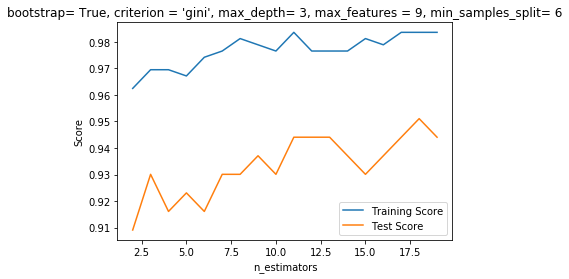

In [53]:
training_accuracy = []
test_accuracy = []
#try n_neighbors from 1 to 20
n_estimators = range(2,20)

for n_estimator in n_estimators:
    #knclf = KNeighborsClassifier(n_neighbors = n_neighbors)
    forest = RandomForestClassifier(n_estimators = n_estimator, random_state = 0, bootstrap= True, criterion = 'gini',
                                   max_depth= 3, max_features = 9, min_samples_split= 6 )
    forest.fit(X_train, y_train)
    training_accuracy.append(forest.score(X_train, y_train))
    test_accuracy.append(forest.score(X_test, y_test))
    
plt.plot(n_estimators, training_accuracy, label = "Training Score")
plt.plot(n_estimators, test_accuracy, label = "Test Score")
plt.ylabel("Score")
plt.xlabel("n_estimators")
plt.legend()
plt.title("bootstrap= True, criterion = 'gini', max_depth= 3, max_features = 9, min_samples_split= 6")
plt.show()

In [59]:
forest5_3 = RandomForestClassifier(n_estimators = 5, random_state = 0, bootstrap= True, criterion = 'gini',
                                   max_depth= 3, max_features = 6, min_samples_split= 6 )
#max_features to 6 from 9
#{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_split': 6}  0.960 (std: 0.012)
forest5_3.fit(X_train, y_train)
print("forest5_3 train score: {:.3f}".format(forest5_3.score(X_train,y_train)))
print("forest5_3 test score: {:.3f}".format(forest5_3.score(X_test,y_test)))

forest5_3 train score: 0.972
forest5_3 test score: 0.944


In [99]:
forest7_3 = RandomForestClassifier(n_estimators = 7, random_state = 0, bootstrap= True, criterion = 'gini',
                                   max_depth= 3, max_features = 6, min_samples_split= 6 )
#max_features to 6 from 9
#{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_split': 6}  0.960 (std: 0.012)
forest7_3.fit(X_train, y_train)
print("forest7_3 train score: {:.3f}".format(forest7_3.score(X_train,y_train)))
print("forest7_3 test score: {:.3f}".format(forest7_3.score(X_test,y_test)))

forest7_3 train score: 0.981
forest7_3 test score: 0.951


In [6]:
forest21_3 = RandomForestClassifier(n_estimators = 21, random_state = 0, bootstrap= True, criterion = 'gini',
                                   max_depth= 3, max_features = 6, min_samples_split= 6 )
#max_features to 6 from 9
#{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_split': 6}  0.960 (std: 0.012)
forest21_3.fit(X_train, y_train)
print("forest21_3 train score: {:.3f}".format(forest21_3.score(X_train,y_train)))
print("forest21_3 test score: {:.3f}".format(forest21_3.score(X_test,y_test)))

forest21_3 train score: 0.984
forest21_3 test score: 0.951


              feature_names  importance
0               mean radius    0.009602
1              mean texture    0.012257
2            mean perimeter    0.006617
3                 mean area    0.070059
4           mean smoothness    0.000124
5          mean compactness    0.006616
6            mean concavity    0.043890
7       mean concave points    0.086031
8             mean symmetry    0.005244
9    mean fractal dimension    0.001468
10             radius error    0.025468
11            texture error    0.002137
12          perimeter error    0.001376
13               area error    0.015099
14         smoothness error    0.000000
15        compactness error    0.002554
16          concavity error    0.002266
17     concave points error    0.003600
18           symmetry error    0.001533
19  fractal dimension error    0.001961
20             worst radius    0.140366
21            worst texture    0.013032
22          worst perimeter    0.183071
23               worst area    0.102215


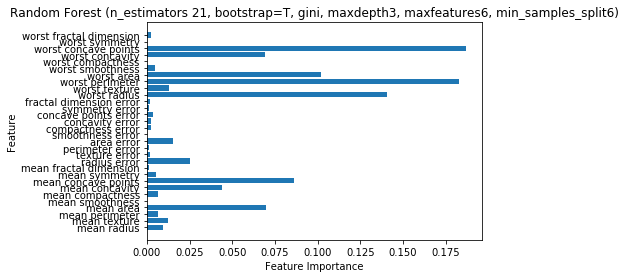

In [7]:
title = "Random Forest (n_estimators 21, bootstrap=T, gini, maxdepth3, maxfeatures6, min_samples_split6)"
#(n_estimators = 21, random_state = 0, bootstrap= True, criterion = 'gini', max_depth= 3, max_features = 6, min_samples_split= 6)
plot_feature_importances_cancer(forest21_3, title)

df = pd.DataFrame({'feature_names': cancer.feature_names, 'importance':forest21_3.feature_importances_})
print(df)

<module 'matplotlib.pyplot' from 'c:\\users\\nfleming\\appdata\\local\\programs\\python\\python37-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

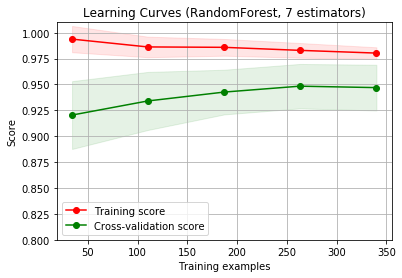

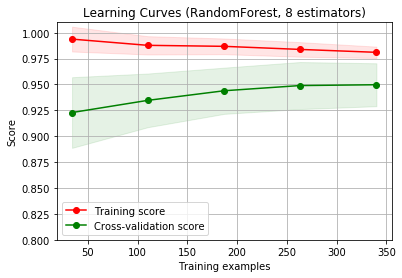

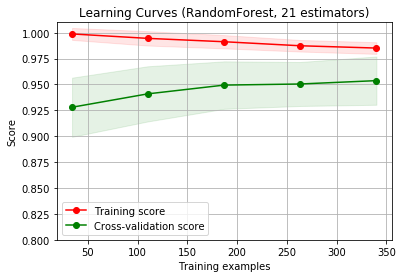

In [102]:
#learning curve
#forest8_3 = RandomForestClassifier(n_estimators = 8, random_state = 0, bootstrap= True, criterion = 'gini',
#                                   max_depth= 3, max_features = 6, min_samples_split= 6 )
def plot_learning_curve (estimator, title, X,y, ylim = None, cv = None, 
                         n_jobs = None, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim (*ylim)
    plt.xlabel ("Training examples")
    plt.ylabel ("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.1, color = "r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r", label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g", label = "Cross-validation score")
    plt.legend(loc ="best")
    return plt

X, y = X_train, y_train

title = "Learning Curves (RandomForest, 7 estimators)"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = forest7_3
plot_learning_curve(estimator, title, X, y, ylim = (0.8, 1.01), cv = cv, n_jobs = 4)

title = "Learning Curves (RandomForest, 8 estimators)"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = forest8_3
plot_learning_curve(estimator, title, X, y, ylim = (0.8, 1.01), cv = cv, n_jobs = 4)

title = "Learning Curves (RandomForest, 21 estimators)"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = forest21_3
plot_learning_curve(estimator, title, X, y, ylim = (0.8, 1.01), cv = cv, n_jobs = 4)

## Boosting(2) - GradientBoostingClassifier

In [27]:
#default: 100 trees of maximum depth 3, learning rate: 0.1
#from sklearn.ensemble import GradientBoostingClassifier
#X_train, X_test, y_train, y_test = train_test_split (cancer.data, cancer.target, stratify = cancer.target, random_state = 0)
gbc = GradientBoostingClassifier(random_state = 0)
gbc.fit(X_train,y_train)
print("gbc train score: {:.3f}".format(gbc.score(X_train,y_train)))
print("gbc train score: {:.3f}".format(gbc.score(X_test,y_test)))

gbc train score: 1.000
gbc train score: 0.958


In [28]:
gbc = GradientBoostingClassifier(random_state=0, max_depth = 1)
gbc.fit(X_train, y_train)
print("gbc train score: {:.3f}".format(gbc.score(X_train,y_train)))
print("gbc train score: {:.3f}".format(gbc.score(X_test,y_test)))

gbc train score: 0.995
gbc train score: 0.965


In [30]:
gbc = GradientBoostingClassifier(random_state=0,  learning_rate = 0.01, verbose = 2)
gbc.fit(X_train, y_train)
print("gbc train score: {:.3f}".format(gbc.score(X_train,y_train)))
print("gbc train score: {:.3f}".format(gbc.score(X_test,y_test)))

gbc train score: 0.995
gbc train score: 0.944


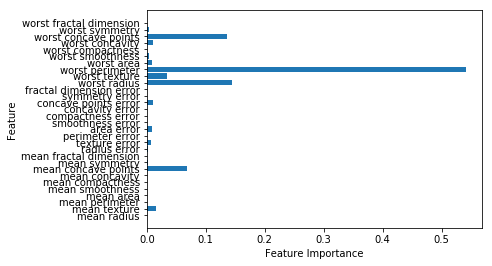

In [31]:
plot_feature_importances_cancer(gbc)

In [32]:
#clf = ensemble.GradientBoostingClassifier(verbose=3) --time?
gbc = GradientBoostingClassifier(random_state=0,   verbose = 2, max_depth = 1)
gbc.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1835            0.10s
         2           1.0696            0.15s
         3           0.9750            0.13s
         4           0.8917            0.12s
         5           0.8227            0.13s
         6           0.7599            0.12s
         7           0.7076            0.12s
         8           0.6586            0.11s
         9           0.6141            0.10s
        10           0.5756            0.10s
        11           0.5423            0.10s
        12           0.5123            0.10s
        13           0.4838            0.10s
        14           0.4588            0.10s
        15           0.4368            0.10s
        16           0.4160            0.09s
        17           0.3981            0.11s
        18           0.3813            0.11s
        19           0.3651            0.11s
        20           0.3511            0.10s
        21           0.3384            0.10s
        2

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=2, warm_start=False)